In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler

import geopandas as gpd

In [2]:
# Load the dataset
tsunami_data = pd.read_csv(r'C:\Users\ungdu\Downloads\Smart-Decision\Tsunami_Cut.csv')
tsunami_data.head()

,Year,Mo,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Vol,Deposits,Country,Location Name,Latitude,...,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Total Deaths,Total Death Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description
0,-2000,NaN,1,1.0,NaN,NaN,0,SYRIA,SYRIAN COASTS,35.683,...,NaN,4.0,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN
1,-1610,NaN,4,6.0,NaN,1351.0,28,GREECE,THERA ISLAND (SANTORINI),36.400,...,NaN,3.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN
2,-1365,NaN,1,1.0,NaN,NaN,0,SYRIA,SYRIAN COASTS,35.683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
3,-1300,NaN,2,0.0,6.0,NaN,0,TURKEY,"IONIAN COASTS, TROAD",39.960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-760,NaN,2,0.0,NaN,NaN,0,ISRAEL,ISRAEL AND LEBANON COASTS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(tsunami_data.isnull().sum())

Year                                     0
Mo                                     151
Tsunami Event Validity                   0
Tsunami Cause Code                       3
Earthquake Magnitude                  1237
Vol                                   2684
Deposits                                 0
Country                                  1
Location Name                            3
Latitude                               375
Longitude                              376
Maximum Water Height (m)              1565
Number of Runups                         0
Tsunami Intensity                     1615
Deaths                                2586
Death Description                     2486
Damage ($Mil)                         2812
Damage Description                    2200
Houses Destroyed                      2758
Houses Destroyed Description          2572
Total Deaths                          2200
Total Death Description               2044
Total Damage ($Mil)                   2699
Total Damag

In [33]:
# Dropping the 'Latitude' and 'Longitude' columns from the DataFrame
tsunami_data = tsunami_data.drop(columns=['Latitude', 'Longitude'])

In [4]:
# Fill missing values for numerical columns with the median
numerical_columns = tsunami_data.select_dtypes(include=['number']).columns
tsunami_data[numerical_columns] = tsunami_data[numerical_columns].fillna(tsunami_data[numerical_columns].median())


In [5]:
# For categorical data, fill missing values with the mode (most frequent value)
categorical_columns = tsunami_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    mode_value = tsunami_data[col].mode()[0]
    tsunami_data[col] = tsunami_data[col].fillna(mode_value)

In [6]:
# Check the cleaned dataset
print(tsunami_data.isnull().sum())


Year                                  0
Mo                                    0
Tsunami Event Validity                0
Tsunami Cause Code                    0
Earthquake Magnitude                  0
Vol                                   0
Deposits                              0
Country                               0
Location Name                         0
Latitude                              0
Longitude                             0
Maximum Water Height (m)              0
Number of Runups                      0
Tsunami Intensity                     0
Deaths                                0
Death Description                     0
Damage ($Mil)                         0
Damage Description                    0
Houses Destroyed                      0
Houses Destroyed Description          0
Total Deaths                          0
Total Death Description               0
Total Damage ($Mil)                   0
Total Damage Description              0
Total Houses Destroyed                0


In [7]:
print(tsunami_data.head())

   Year   Mo  Tsunami Event Validity  Tsunami Cause Code  \
0 -2000  7.0                       1                 1.0   
1 -1610  7.0                       4                 6.0   
2 -1365  7.0                       1                 1.0   
3 -1300  7.0                       2                 0.0   
4  -760  7.0                       2                 0.0   

   Earthquake Magnitude     Vol  Deposits Country              Location Name  \
0                   7.0  4412.0         0   SYRIA              SYRIAN COASTS   
1                   7.0  1351.0        28  GREECE   THERA ISLAND (SANTORINI)   
2                   7.0  4412.0         0   SYRIA              SYRIAN COASTS   
3                   6.0  4412.0         0  TURKEY       IONIAN COASTS, TROAD   
4                   7.0  4412.0         0  ISRAEL  ISRAEL AND LEBANON COASTS   

   Latitude  ...  Damage ($Mil)  Damage Description  Houses Destroyed  \
0    35.683  ...            5.0                 4.0             223.0   
1    36.400 

In [8]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = r'C:\Users\ungdu\Downloads\Smart-Decision\New_Tsunami.csv'
tsunami_data.to_csv(cleaned_file_path, index=False)

print("Cleaned dataset saved to:", cleaned_file_path)

Cleaned dataset saved to: C:\Users\ungdu\Downloads\Smart-Decision\New_Tsunami.csv


In [9]:
new_tsunami_data = pd.read_csv(r'C:\Users\ungdu\Downloads\Smart-Decision\New_Tsunami.csv')


In [10]:
# Display the first few rows and check for missing values
new_data_preview = new_tsunami_data.head()
new_data_preview

,Year,Mo,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Vol,Deposits,Country,Location Name,Latitude,...,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Total Deaths,Total Death Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description
0,-2000,7.0,1,1.0,7.0,4412.0,0,SYRIA,SYRIAN COASTS,35.683,...,5.0,4.0,223.0,2.0,38.0,3.0,46.74,4.0,789.5,3.0
1,-1610,7.0,4,6.0,7.0,1351.0,28,GREECE,THERA ISLAND (SANTORINI),36.400,...,5.0,3.0,223.0,2.0,38.0,3.0,46.74,3.0,789.5,3.0
2,-1365,7.0,1,1.0,7.0,4412.0,0,SYRIA,SYRIAN COASTS,35.683,...,5.0,1.0,223.0,2.0,38.0,2.0,46.74,3.0,789.5,3.0
3,-1300,7.0,2,0.0,6.0,4412.0,0,TURKEY,"IONIAN COASTS, TROAD",39.960,...,5.0,1.0,223.0,2.0,38.0,2.0,46.74,2.0,789.5,3.0
4,-760,7.0,2,0.0,7.0,4412.0,0,ISRAEL,ISRAEL AND LEBANON COASTS,23.761,...,5.0,1.0,223.0,2.0,38.0,2.0,46.74,2.0,789.5,3.0


In [11]:
new_missing_values = new_tsunami_data.isnull().sum()

new_missing_values

Year                                  0
Mo                                    0
Tsunami Event Validity                0
Tsunami Cause Code                    0
Earthquake Magnitude                  0
Vol                                   0
Deposits                              0
Country                               0
Location Name                         0
Latitude                              0
Longitude                             0
Maximum Water Height (m)              0
Number of Runups                      0
Tsunami Intensity                     0
Deaths                                0
Death Description                     0
Damage ($Mil)                         0
Damage Description                    0
Houses Destroyed                      0
Houses Destroyed Description          0
Total Deaths                          0
Total Death Description               0
Total Damage ($Mil)                   0
Total Damage Description              0
Total Houses Destroyed                0


In [12]:
# Categorize the Earthquake Magnitude into 'Magnitude Category'
new_tsunami_data['Magnitude Category'] = pd.cut(new_tsunami_data['Earthquake Magnitude'],
                                                bins=[-float('inf'), 6, 7.5, float('inf')],
                                                labels=['Low', 'Medium', 'High'])

In [13]:
# Categorize the 'Mo' (Month) column into 'Season'
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

new_tsunami_data['Season'] = new_tsunami_data['Mo'].apply(categorize_season)


In [14]:
# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [15]:
# Min-Max scaling for 'Latitude' and 'Longitude'
new_tsunami_data[['Latitude', 'Longitude']] = min_max_scaler.fit_transform(new_tsunami_data[['Latitude', 'Longitude']])

In [16]:
# Standard scaling for 'Earthquake Magnitude'
new_tsunami_data['Earthquake Magnitude'] = standard_scaler.fit_transform(new_tsunami_data[['Earthquake Magnitude']])

In [17]:
# Display the first few rows to see the transformations
print(new_tsunami_data.head())

   Year   Mo  Tsunami Event Validity  Tsunami Cause Code  \
0 -2000  7.0                       1                 1.0   
1 -1610  7.0                       4                 6.0   
2 -1365  7.0                       1                 1.0   
3 -1300  7.0                       2                 0.0   
4  -760  7.0                       2                 0.0   

   Earthquake Magnitude     Vol  Deposits Country              Location Name  \
0             -0.020365  4412.0         0   SYRIA              SYRIAN COASTS   
1             -0.020365  1351.0        28  GREECE   THERA ISLAND (SANTORINI)   
2             -0.020365  4412.0         0   SYRIA              SYRIAN COASTS   
3             -1.694593  4412.0         0  TURKEY       IONIAN COASTS, TROAD   
4             -0.020365  4412.0         0  ISRAEL  ISRAEL AND LEBANON COASTS   

   Latitude  ...  Houses Destroyed  Houses Destroyed Description  \
0  0.698048  ...             223.0                           2.0   
1  0.703119  ...      

In [18]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
# Feature Selection
features = ['Latitude', 'Longitude', 'Earthquake Magnitude', 'Number of Runups', 'Tsunami Cause Code']
data = new_tsunami_data[features].values

In [20]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [21]:
# Define the VAE model
input_dim = data_scaled.shape[1]
latent_dim = 2

In [22]:
# Encoder
inputs = Input(shape=(input_dim,))
h = Dense(16, activation='relu')(inputs)
h = Dense(8, activation='relu')(h)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

In [23]:
# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.random.normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Sample z
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

In [24]:
# Decoder
decoder_h = Dense(8, activation='relu')
decoder_mean = Dense(input_dim, activation='linear')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

class VAEModel(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAEModel, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = sampling([z_mean, z_log_var])
        x_decoded_mean = self.decoder(z)
        
        # Compute VAE loss
        reconstruction_loss = tf.reduce_sum(tf.square(inputs - x_decoded_mean), axis=-1)
        kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        kl_loss = tf.reduce_sum(kl_loss, axis=-1)
        kl_loss *= -0.5
        total_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
        self.add_loss(total_loss)
        
        return x_decoded_mean

In [25]:
# Define the encoder and decoder models
encoder = Model(inputs, [z_mean, z_log_var])
decoder = Model(z, x_decoded_mean)

# Instantiate and compile the VAE model
vae = VAEModel(encoder, decoder)
vae.compile(optimizer='adam')

In [26]:
# Train the VAE
vae.fit(data_scaled, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 5.2177 - val_loss: 10.7805
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0570 - val_loss: 10.0439
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9309 - val_loss: 9.9463
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8094 - val_loss: 9.8688
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7948 - val_loss: 9.9443
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7786 - val_loss: 9.8945
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7775 - val_loss: 9.8770
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7610 - val_loss: 9.9145
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7445 - val_loss: 9.8896
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7489 - val_loss: 9.8537
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7000 - val_loss: 9.8266
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7113 - val

In [27]:

# Encode the data to the latent space
encoded_data = encoder.predict(data_scaled)[0]  # Use only z_mean for encoding

# Convert encoded data to a dataframe for analysis
encoded_data_df = pd.DataFrame(encoded_data, columns=['Latent Dim 1', 'Latent Dim 2'])
print(encoded_data_df.head())


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
   Latent Dim 1  Latent Dim 2
0     -0.526491     -0.113823
1      0.397403     -1.333376
2     -0.523430     -0.114807
3     -0.606537     -0.497457
4     -0.338946      0.108065


In [28]:
# Define the number of clusters
num_clusters = 3  # Adjust based on your data and requirements

In [29]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(encoded_data_df)

In [30]:
# Add cluster labels to the encoded data DataFrame
encoded_data_df['Cluster'] = clusters

# Print the first few rows of the DataFrame to see the clusters
print(encoded_data_df.head())

   Latent Dim 1  Latent Dim 2  Cluster
0     -0.526491     -0.113823        1
1      0.397403     -1.333376        0
2     -0.523430     -0.114807        1
3     -0.606537     -0.497457        1
4     -0.338946      0.108065        1


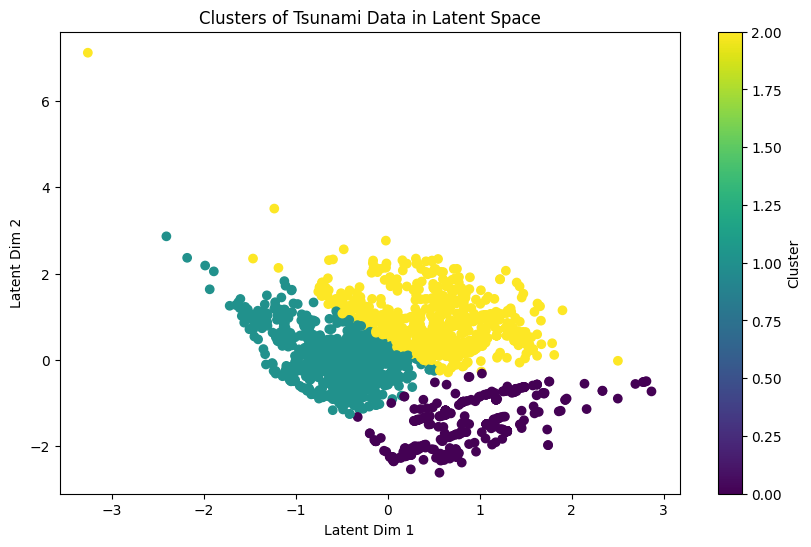

In [31]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(encoded_data_df['Latent Dim 1'], encoded_data_df['Latent Dim 2'], c=encoded_data_df['Cluster'], cmap='viridis')
plt.xlabel('Latent Dim 1')
plt.ylabel('Latent Dim 2')
plt.title('Clusters of Tsunami Data in Latent Space')
plt.colorbar(label='Cluster')
plt.show()


In [32]:
# Merge the clusters with the original data
clustered_data = pd.concat([new_tsunami_data, encoded_data_df['Cluster']], axis=1)

# Ensure only numeric columns are included in the summary statistics
numeric_columns = clustered_data.select_dtypes(include='number').columns
cluster_summary = clustered_data[numeric_columns].groupby('Cluster').mean()

print(cluster_summary)

                Year        Mo  Tsunami Event Validity  Tsunami Cause Code  \
Cluster                                                                      
0        1872.331707  6.597561                1.912195            7.536585   
1        1752.171660  6.627965                2.358926            1.012484   
2        1917.812721  6.619552                2.702002            1.015312   

         Earthquake Magnitude          Vol  Deposits  Latitude  Longitude  \
Cluster                                                                     
0                   -0.086517  4194.490244  0.295122  0.629771   0.547481   
1                   -0.181308  4413.176030  0.298377  0.678711   0.607249   
2                    0.383896  4394.102473  0.246172  0.349205   0.624671   

         Maximum Water Height (m)  ...  Damage ($Mil)  Damage Description  \
Cluster                            ...                                      
0                        9.314683  ...       5.657880            1.19